# 8. Neural networks and deep learning

## 8.1 Jelly Fish classification

This dataset contains 900 images of jellyfish belonging to six different categories and species: mauve stinger jellyfish, moon jellyfish, barrel jellyfish, blue jellyfish, compass jellyfish, and lion’s mane jellyfish. You can apply ML techniques to gain insights into jellyfish classification, species identification, and color analysis.

Dataset: https://www.kaggle.com/datasets/anshtanwar/jellyfish-types

* Installing TensorFlow
* Loading images

## 8.2 TensorFlow and Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-12-09 00:56:09.513580: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-09 00:56:09.516352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 00:56:09.564318: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 00:56:09.565113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 00:56:12.871608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
from tensorflow.keras.preprocessing.image import load_img

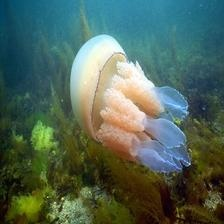

In [4]:
path="./archive/barrel_jellyfish/"
name = '01.jpeg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img=load_img(fullname,target_size=(299,299))

In [6]:
x=np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-12-09 00:58:50.459583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-09 00:58:50.742725: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


91884032/91884032 [==============================] - 3s 0us/step


In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

1/1 [==============================] - 1s 935ms/step


In [17]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n01910747', 'jellyfish', 0.6083228),
  ('n01914609', 'sea_anemone', 0.034467954),
  ('n01917289', 'brain_coral', 0.02497657),
  ('n09256479', 'coral_reef', 0.022956097),
  ('n01496331', 'electric_ray', 0.021793498)]]

## 8.4 Convolutional neural networks

Types of layers: convolutional and dense

* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with ImageDataGenerator
* Train Xception on smaller images (150x150)

(Better to run it with a GPU)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './archive/Train_Test_Valid/Train',
    target_size=(150, 150),
    batch_size=32
)

Found 900 images belonging to 6 classes.


In [20]:
train_ds.class_indices

{'Moon_jellyfish': 0,
 'barrel_jellyfish': 1,
 'blue_jellyfish': 2,
 'compass_jellyfish': 3,
 'lions_mane_jellyfish': 4,
 'mauve_stinger_jellyfish': 5}

In [21]:
X, y = next(train_ds)

In [22]:
y[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './archive/Train_Test_Valid/valid',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 39 images belonging to 6 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(6)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 2s 0us/step


In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
29/29 [==============================] - 23s 711ms/step - loss: 1.1713 - accuracy: 0.6411 - val_loss: 1.1581 - val_accuracy: 0.6667
Epoch 2/10
29/29 [==============================] - 20s 674ms/step - loss: 0.2464 - accuracy: 0.9222 - val_loss: 1.0681 - val_accuracy: 0.7436
Epoch 3/10
29/29 [==============================] - 19s 669ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 1.0343 - val_accuracy: 0.7436
Epoch 4/10
29/29 [==============================] - 19s 648ms/step - loss: 0.0337 - accuracy: 0.9933 - val_loss: 1.1111 - val_accuracy: 0.7436
Epoch 5/10
29/29 [==============================] - 20s 674ms/step - loss: 0.0262 - accuracy: 0.9956 - val_loss: 1.1220 - val_accuracy: 0.7436
Epoch 6/10
29/29 [==============================] - 20s 681ms/step - loss: 0.0138 - accuracy: 0.9989 - val_loss: 1.1845 - val_accuracy: 0.7436
Epoch 7/10
29/29 [==============================] - 20s 672ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.1797 - val_accuracy: 0.7692

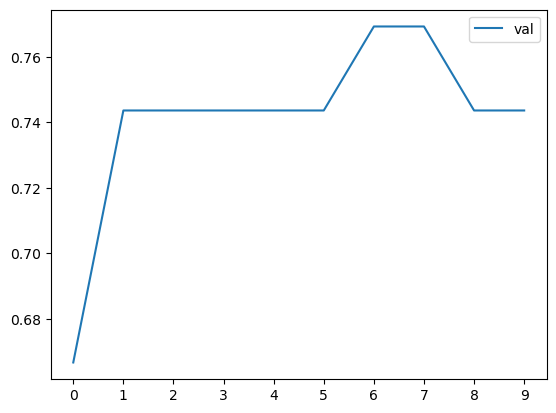

In [27]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [29]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [30]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
29/29 [==============================] - 23s 702ms/step - loss: 1.9128 - accuracy: 0.1911 - val_loss: 1.7519 - val_accuracy: 0.2821
Epoch 2/10
29/29 [==============================] - 20s 672ms/step - loss: 1.6411 - accuracy: 0.3322 - val_loss: 1.5689 - val_accuracy: 0.3846
Epoch 3/10
29/29 [==============================] - 20s 675ms/step - loss: 1.4447 - accuracy: 0.4478 - val_loss: 1.4270 - val_accuracy: 0.4359
Epoch 4/10
29/29 [==============================] - 19s 671ms/step - loss: 1.2919 - accuracy: 0.5456 - val_loss: 1.3197 - val_accuracy: 0.4359
Epoch 5/10
29/29 [==============================] - 20s 672ms/step - loss: 1.1664 - accuracy: 0.6044 - val_loss: 1.2368 - val_accuracy: 0.5641
Epoch 6/10
29/29 [==============================] - 20s 671ms/step - loss: 1.0676 - accuracy: 0.6411 - val_loss: 1.1761 - val_accuracy: 0.5641
Epoch 7/10
29/29 [==============================] - 20s 687ms/step - loss: 0.9881 - accuracy: 0.6711 - val_loss: 1.1162 - val_accuracy:

In [31]:
del scores[0.1]
del scores[0.0001]

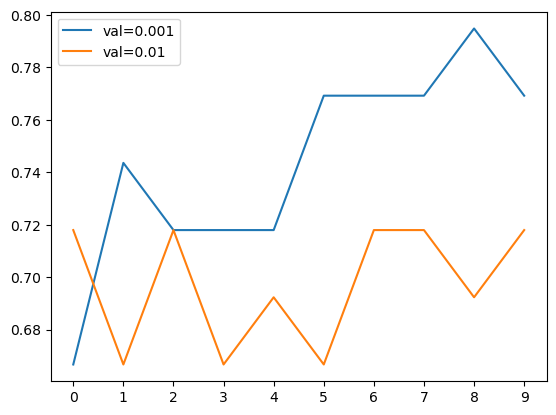

In [32]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [33]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [34]:
model.save_weights('model_v1.h5', save_format='h5')

In [35]:
!ls

archive  model_v1.h5  notebook.ipynb


In [36]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [37]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.2609 - accuracy: 0.5267

/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 22s 680ms/step - loss: 1.2609 - accuracy: 0.5267 - val_loss: 1.0105 - val_accuracy: 0.6923
Epoch 2/10
29/29 [==============================] - 19s 651ms/step - loss: 0.6561 - accuracy: 0.7878 - val_loss: 0.8137 - val_accuracy: 0.7692
Epoch 3/10
29/29 [==============================] - 19s 650ms/step - loss: 0.4613 - accuracy: 0.8689 - val_loss: 0.7997 - val_accuracy: 0.6667
Epoch 4/10
29/29 [==============================] - 19s 654ms/step - loss: 0.3519 - accuracy: 0.9100 - val_loss: 0.7437 - val_accuracy: 0.8205
Epoch 5/10
29/29 [==============================] - 19s 657ms/step - loss: 0.2809 - accuracy: 0.9411 - val_loss: 0.7192 - val_accuracy: 0.7692
Epoch 6/10
29/29 [==============================] - 19s 642ms/step - loss: 0.2283 - accuracy: 0.9633 - val_loss: 0.7530 - val_accuracy: 0.7436
Epoch 7/10
29/29 [==============================] - 19s 640ms/step - loss: 0.1890 - accuracy: 0.9744 - val_loss: 0.7246 - val_accuracy: 0.7436
Epoch 8/10

## 8.8 Adding more layers

* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [38]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(6)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [39]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
29/29 [==============================] - 22s 678ms/step - loss: 1.4013 - accuracy: 0.5056 - val_loss: 1.1613 - val_accuracy: 0.6154
Epoch 2/10
29/29 [==============================] - 19s 648ms/step - loss: 0.8708 - accuracy: 0.7256 - val_loss: 0.9893 - val_accuracy: 0.6667
Epoch 3/10
29/29 [==============================] - 19s 646ms/step - loss: 0.6438 - accuracy: 0.7667 - val_loss: 0.9495 - val_accuracy: 0.7179
Epoch 4/10
29/29 [==============================] - 22s 749ms/step - loss: 0.4692 - accuracy: 0.8633 - val_loss: 0.9611 - val_accuracy: 0.7436
Epoch 5/10
29/29 [==============================] - 20s 694ms/step - loss: 0.3364 - accuracy: 0.9244 - val_loss: 0.7879 - val_accuracy: 0.7179
Epoch 6/10
29/29 [==============================] - 19s 644ms/step - loss: 0.2312 - accuracy: 0.9700 - val_loss: 0.8238 - val_accuracy: 0.7436
Epoch 7/10
29/29 [==============================] - 19s 647ms/step - loss: 0.1829 - accuracy: 0.9744 - val_loss: 0.8284 - val_accuracy: 0.7

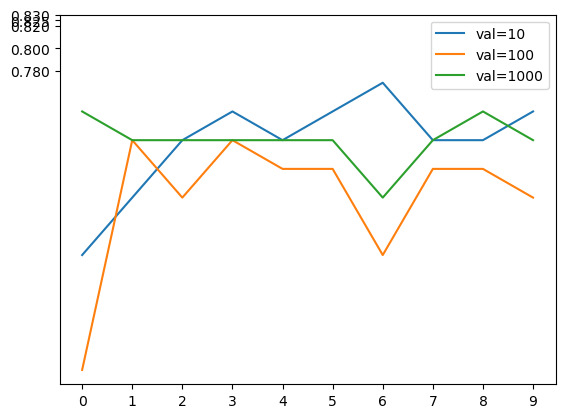

In [40]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [41]:
def make_model(learning_rate=0.01, size_inner=10, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
learning_rate = 0.001
size = 10

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
29/29 [==============================] - 23s 677ms/step - loss: 1.4797 - accuracy: 0.4078 - val_loss: 1.3787 - val_accuracy: 0.5128
Epoch 2/30
29/29 [==============================] - 19s 646ms/step - loss: 0.9442 - accuracy: 0.6656 - val_loss: 1.1424 - val_accuracy: 0.6410
Epoch 3/30
29/29 [==============================] - 19s 646ms/step - loss: 0.6724 - accuracy: 0.8000 - val_loss: 1.0136 - val_accuracy: 0.6923
Epoch 4/30
29/29 [==============================] - 19s 645ms/step - loss: 0.4855 - accuracy: 0.8733 - val_loss: 0.9431 - val_accuracy: 0.6667
Epoch 5/30
29/29 [==============================] - 19s 649ms/step - loss: 0.3550 - accuracy: 0.9233 - val_loss: 0.8237 - val_accuracy: 0.6923
Epoch 6/30
29/29 [==============================] - 19s 640ms/step - loss: 0.2635 - accuracy: 0.9533 - val_loss: 0.8323 - val_accuracy: 0.7436
Epoch 7/30
29/29 [==============================] - 19s 642ms/step - loss: 0.2020 - accuracy: 0.9656 - val_loss: 0.8620 - val_accuracy: 0.

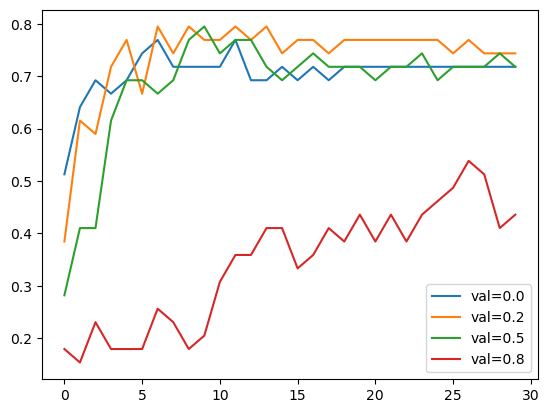

In [43]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

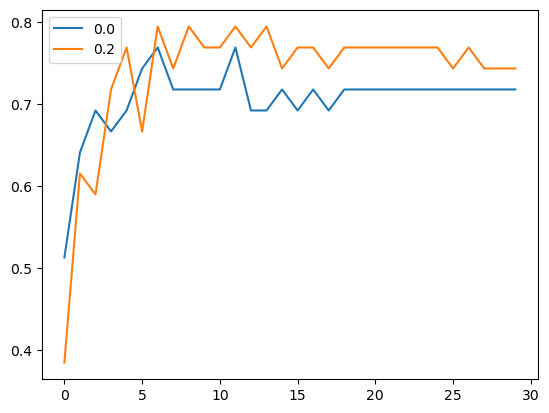

In [44]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [45]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './archive/Train_Test_Valid/Train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './archive/Train_Test_Valid/valid',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.


In [46]:
learning_rate = 0.001
size = 10
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
29/29 [==============================] - 22s 680ms/step - loss: 1.4555 - accuracy: 0.3767 - val_loss: 1.1072 - val_accuracy: 0.6667
Epoch 2/50
29/29 [==============================] - 19s 647ms/step - loss: 0.9925 - accuracy: 0.6178 - val_loss: 0.9580 - val_accuracy: 0.6923
Epoch 3/50
29/29 [==============================] - 19s 649ms/step - loss: 0.8163 - accuracy: 0.7011 - val_loss: 0.8895 - val_accuracy: 0.7436
Epoch 4/50
29/29 [==============================] - 19s 651ms/step - loss: 0.7307 - accuracy: 0.7467 - val_loss: 0.8423 - val_accuracy: 0.7179
Epoch 5/50
29/29 [==============================] - 19s 646ms/step - loss: 0.6771 - accuracy: 0.7478 - val_loss: 0.8405 - val_accuracy: 0.7436
Epoch 6/50
29/29 [==============================] - 19s 643ms/step - loss: 0.5840 - accuracy: 0.7889 - val_loss: 0.7894 - val_accuracy: 0.6923
Epoch 7/50
29/29 [==============================] - 19s 646ms/step - loss: 0.5371 - accuracy: 0.8011 - val_loss: 0.7915 - val_accuracy: 0.7179

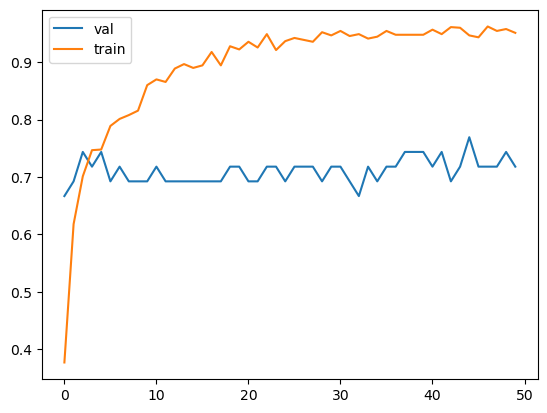

In [47]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [49]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [50]:
input_size = 299

In [51]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './archive/Train_Test_Valid/Train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './archive/Train_Test_Valid/valid',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.


In [52]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [53]:
learning_rate = 0.001
size = 10
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
29/29 [==============================] - 89s 3s/step - loss: 1.6500 - accuracy: 0.3089 - val_loss: 1.5164 - val_accuracy: 0.5385
Epoch 2/50
29/29 [==============================] - 84s 3s/step - loss: 1.4351 - accuracy: 0.4400 - val_loss: 1.3353 - val_accuracy: 0.6667
Epoch 3/50
29/29 [==============================] - 84s 3s/step - loss: 1.2852 - accuracy: 0.5300 - val_loss: 1.3108 - val_accuracy: 0.6154
Epoch 4/50
29/29 [==============================] - 84s 3s/step - loss: 1.1882 - accuracy: 0.5544 - val_loss: 1.2007 - val_accuracy: 0.6667
Epoch 5/50
29/29 [==============================] - 84s 3s/step - loss: 1.1016 - accuracy: 0.6278 - val_loss: 1.0882 - val_accuracy: 0.7436
Epoch 6/50
29/29 [==============================] - 84s 3s/step - loss: 1.0272 - accuracy: 0.6489 - val_loss: 1.1233 - val_accuracy: 0.6667
Epoch 7/50
29/29 [==============================] - 84s 3s/step - loss: 1.0041 - accuracy: 0.6656 - val_loss: 1.0215 - val_accuracy: 0.6923
Epoch 8/50
29/29 [==

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [56]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './archive/Train_Test_Valid/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 40 images belonging to 6 classes.


In [57]:
model = keras.models.load_model('xception_v4_1_17_0.846.h5')

In [58]:
model.evaluate(test_ds)

2/2 [==============================] - 4s 723ms/step - loss: 0.4858 - accuracy: 0.8500


[0.48579683899879456, 0.8500000238418579]

In [59]:
path = './archive/Train_Test_Valid/test/lions_mane_jellyfish/67.jpg' 

In [60]:
img=load_img(path,target_size=(299, 299))

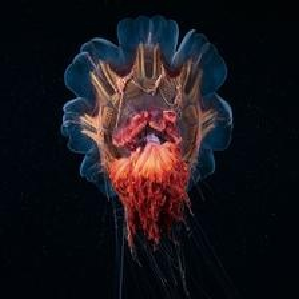

In [61]:
img

In [62]:
import numpy as np

In [63]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [64]:
X = preprocess_input(X)

In [65]:
pred = model.predict(X)

1/1 [==============================] - 1s 815ms/step


In [66]:
classes=['Moon_jellyfish',
 'barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish']

In [67]:
dict(zip(classes, pred[0]))

{'Moon_jellyfish': 1.8297341,
 'barrel_jellyfish': -3.8549948,
 'blue_jellyfish': 0.5004834,
 'compass_jellyfish': 0.67952096,
 'lions_mane_jellyfish': 4.0591087,
 'mauve_stinger_jellyfish': 0.12788905}